# Training the model

<br>

#### Necessary imports for keras

***

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays.
import numpy as np

# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Nicer plots.
import seaborn as sns

import sklearn.model_selection as skms

In [2]:
# Data set
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

X = df['speed']
y = df['power']

print(df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


Text(0, 0.5, 'Power')

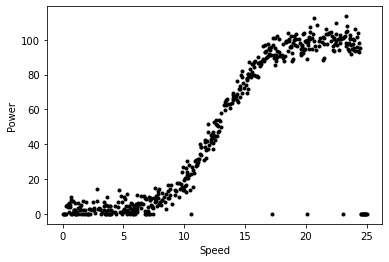

In [3]:
# Plotting data set.
plt.plot(X, y, 'k.')
plt.xlabel("Speed")
plt.ylabel("Power")

<br>
After plotting the data set we can determine that the function used to get power from the speed is sigmoid. The reasoning behind this is due to the shape of the graph.  The difference in this situation is that the values are all positive instead of beginning both negative and positive.
<br>

***

##### Sigmoid Graph Example


<img style="float: left;" src="https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png" width="500" height="500">

In [4]:
# Printing outliers
outliers = df[X > 10][y == 0.000]
print(outliers)

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


<ipython-input-4-6d17a4e2b3fb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[X > 10][y == 0.000]


In [5]:
df = df.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499])

In [6]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
X = X.reshape(-1,1)

Text(0, 0.5, 'Power')

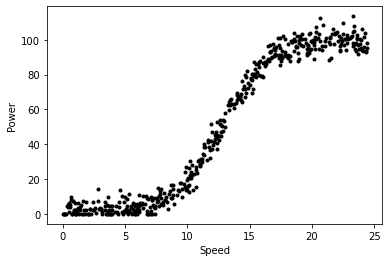

In [7]:
# Plotting data set.
plt.plot(X, y, 'k.')
plt.xlabel("Speed")
plt.ylabel("Power")

In [8]:
df.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


<br>
https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb
<br>

In [9]:
import sklearn.linear_model as sklm
model = sklm.LinearRegression()

model.fit(X, y)
accurancy = model.score(X, y)

print("The accurancy or 'regression' of this model is: ", accurancy)

The accurancy or 'regression' of this model is:  0.9025487607456801


In [10]:
# Getting the test data set.
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=0)

<br>
https://keras.io/api/models/model/
<br>

In [11]:
# Create a model for neural network.
# model = kr.models.Sequential() - change to model above

inputLayer = kr.Input(shape=(1,))
hiddenLayer1 = kr.layers.Dense(50, activation="sigmoid")(inputLayer)
hiddenLayer2 = kr.layers.Dense(50, activation="sigmoid")(hiddenLayer1)
hiddenLayer3 = kr.layers.Dense(30, activation="sigmoid")(hiddenLayer2)
outputs = kr.layers.Dense(1,)(hiddenLayer3)
model = kr.Model(inputLayer, outputs=outputs)

#model.add(kr.layers.Dense(3, activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
# Train the neural network on our df data
model.fit(X, y, epochs=500)

In [ ]:
# Take five hand-picked values and see their predictions.
model.predict([1.0,3.0,10.0,50.0,75.0])

In [ ]:
# Train the neural network on our test data set
model.fit(X_test, y_test, epochs=500)

In [ ]:
# Let's plot our predictions of the x values we trained on
plt.plot(X, y, 'k.', label='actual')
plt.plot(X_test, model.predict(X_test), 'b.', label='prediction')
plt.legend();
plt.xlabel("Speed")
plt.ylabel("Power")

<br>
https://keras.io/examples/vision/mnist_convnet/

***

# End